In [0]:
#importing libraries

from keras.layers import Input, Lambda, Dense, Flatten
from keras.models import Model
from keras.applications.vgg16 import VGG16
from keras.applications.vgg16 import preprocess_input
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
import numpy as np
from glob import glob
import matplotlib.pyplot as plt

In [0]:
# re-size all the images 
IMAGE_SIZE = [224, 224]

#adding path to dataset
train_path = '/content/drive/My Drive/Colab Notebooks/images/train'
valid_path = '/content/drive/My Drive/Colab Notebooks/images/validation'

In [0]:
#removing the final layer 

vgg = VGG16(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)

In [0]:
# don't train existing weights of pre-trained model

for layer in vgg.layers:
  layer.trainable = False

In [0]:
  # useful for getting number of classes of dataset

folders = glob('/content/drive/My Drive/Colab Notebooks/images/train/*')

In [0]:
# our layers - you can add more if you want

x = Flatten()(vgg.output)

prediction = Dense(len(folders), activation='softmax')(x)

In [0]:
model = Model(inputs=vgg.input, outputs=prediction)

In [24]:
# view the structure of the model

model.summary()

Model: "model_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         (None, 224, 224, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0   

In [0]:
# specifying the loss, optimizer value to the model

model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)

In [0]:
# Augumenting the existing images so as to get better training dataset.


train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

In [0]:
test_datagen = ImageDataGenerator(rescale = 1./255)

In [29]:
training_set = train_datagen.flow_from_directory('/content/drive/My Drive/Colab Notebooks/images/train',
                                                 target_size = (224, 224),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

Found 3927 images belonging to 3 classes.


In [30]:
test_set = test_datagen.flow_from_directory('/content/drive/My Drive/Colab Notebooks/images/validation',
                                            target_size = (224, 224),
                                            batch_size = 32,
                                            class_mode = 'categorical')

Found 159 images belonging to 3 classes.


In [31]:
#compiling the model.

r = model.fit_generator(
  training_set,
  validation_data=test_set,
  epochs=5,
  steps_per_epoch=len(training_set),
  validation_steps=len(test_set)
)

Epoch 1/5
123/123 [==============================] - 1391s 11s/step - loss: 0.3251 - accuracy: 0.8918 - val_loss: 0.1445 - val_accuracy: 0.9811
Epoch 2/5
123/123 [==============================] - 1384s 11s/step - loss: 0.1219 - accuracy: 0.9666 - val_loss: 0.1317 - val_accuracy: 0.9560
Epoch 3/5
123/123 [==============================] - 1382s 11s/step - loss: 0.0856 - accuracy: 0.9812 - val_loss: 0.1080 - val_accuracy: 0.9371
Epoch 4/5
123/123 [==============================] - 1380s 11s/step - loss: 0.0728 - accuracy: 0.9852 - val_loss: 0.1225 - val_accuracy: 0.9874
Epoch 5/5
123/123 [==============================] - 1383s 11s/step - loss: 0.0633 - accuracy: 0.9842 - val_loss: 0.1816 - val_accuracy: 0.9497


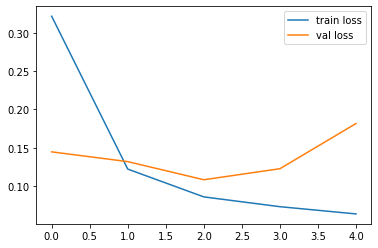

<Figure size 432x288 with 0 Axes>

In [32]:
#plotting the loss graph


plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

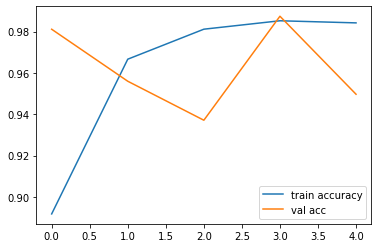

<Figure size 432x288 with 0 Axes>

In [41]:
#plotting the accuracy plot 

plt.plot(r.history['accuracy'], label='train accuracy')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')